In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linea

r algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/test_heart.csv
/kaggle/input/heart-disease-prediction/train_heart.csv


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [179]:
train = pd.read_csv(r"/kaggle/input/heart-disease-prediction/train_heart.csv")
test = pd.read_csv(r"/kaggle/input/heart-disease-prediction/test_heart.csv")

In [180]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [181]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [182]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [184]:
train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


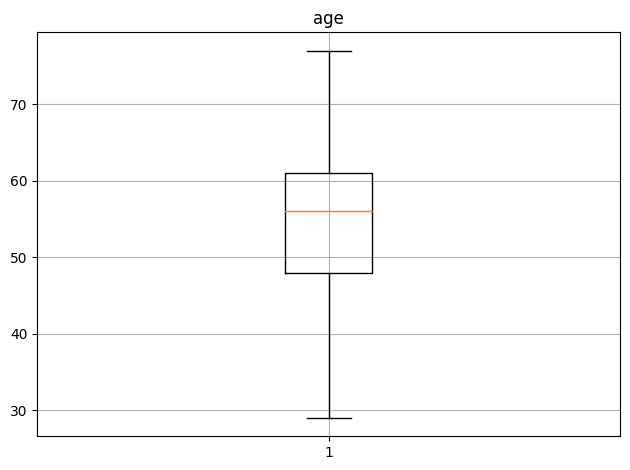

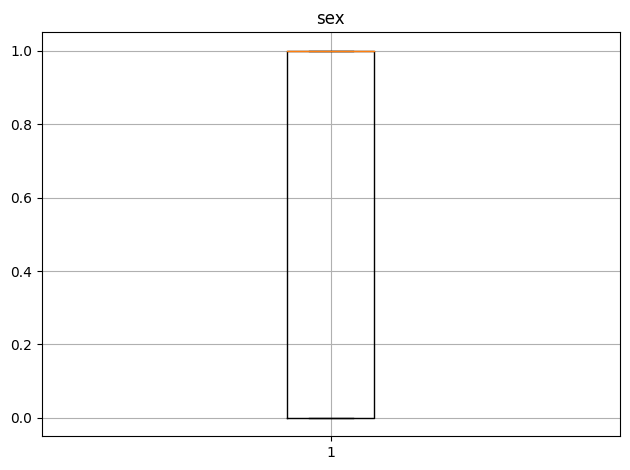

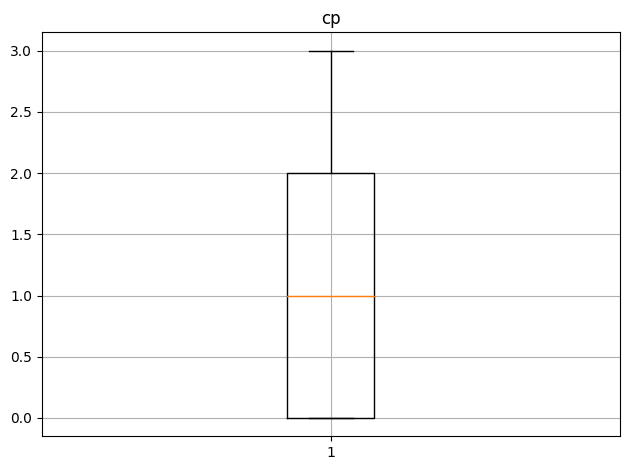

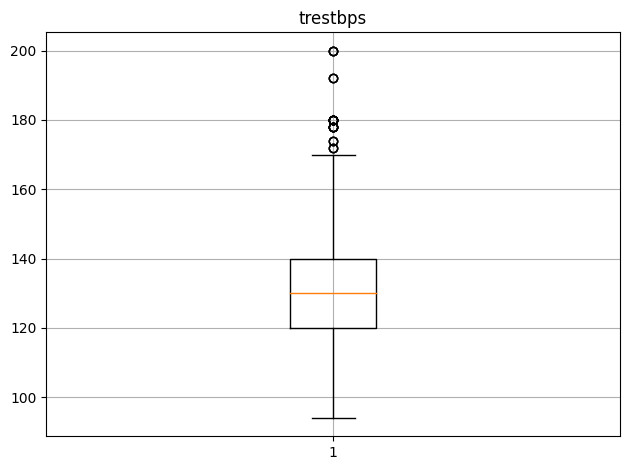

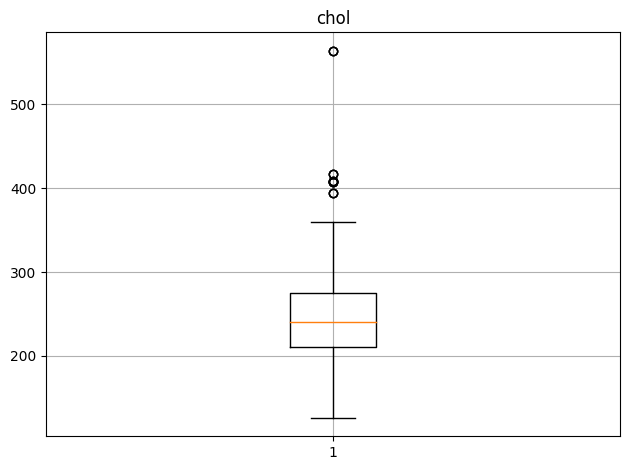

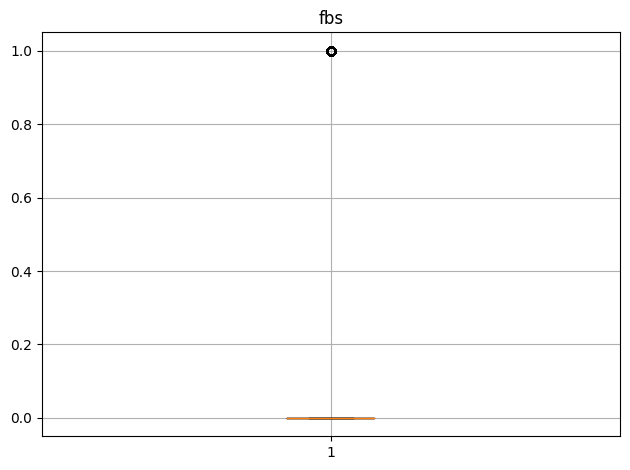

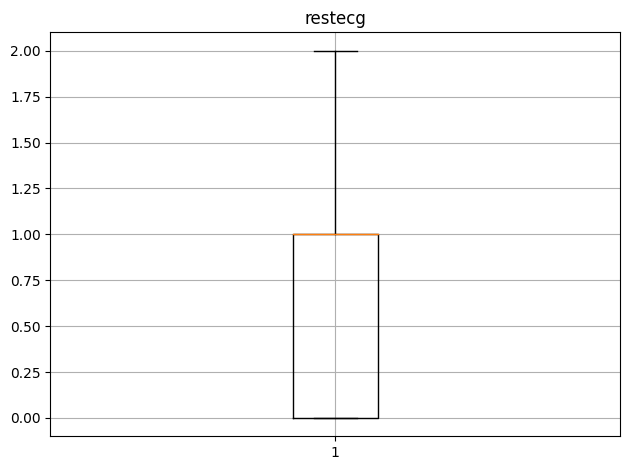

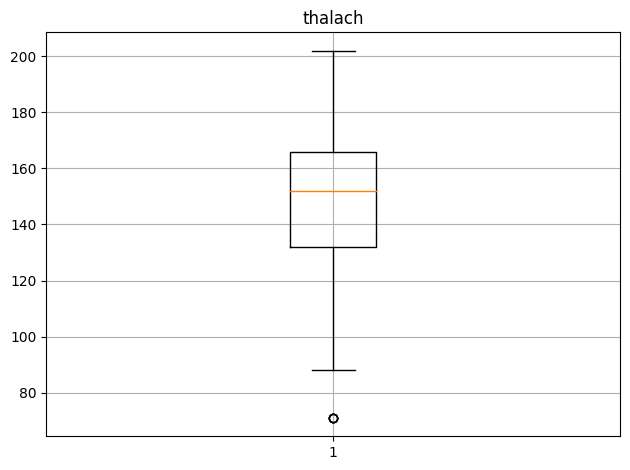

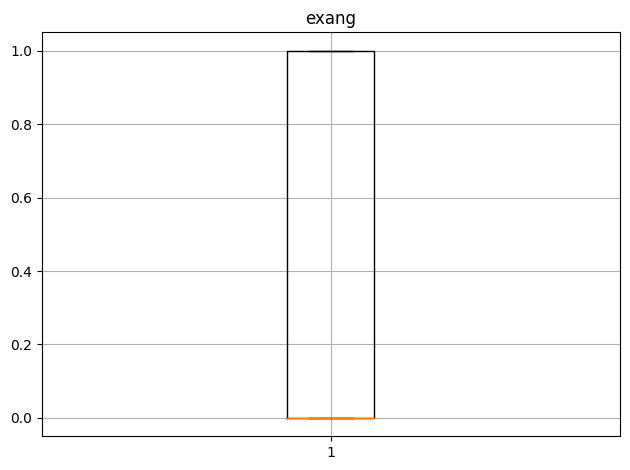

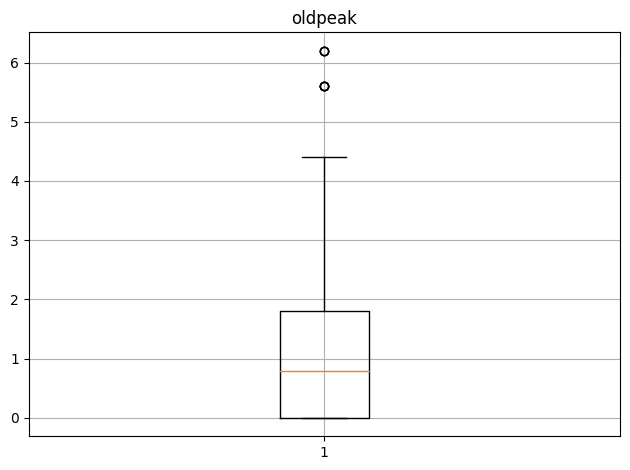

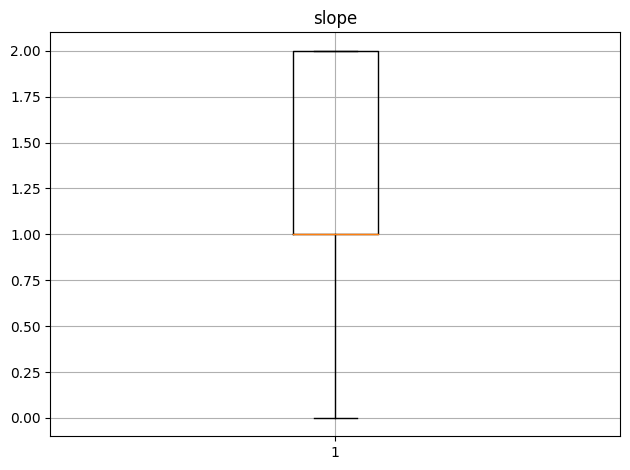

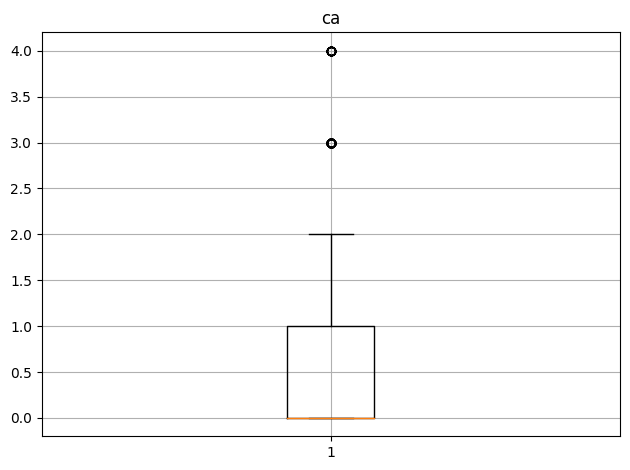

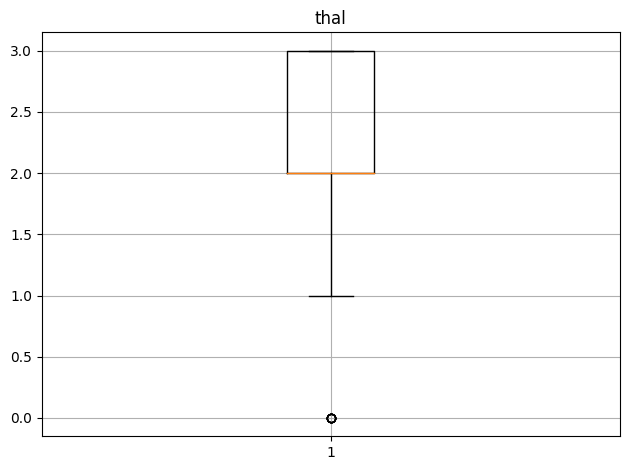

In [185]:
for i in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    plt.boxplot(train[i])
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [186]:
from scipy import stats

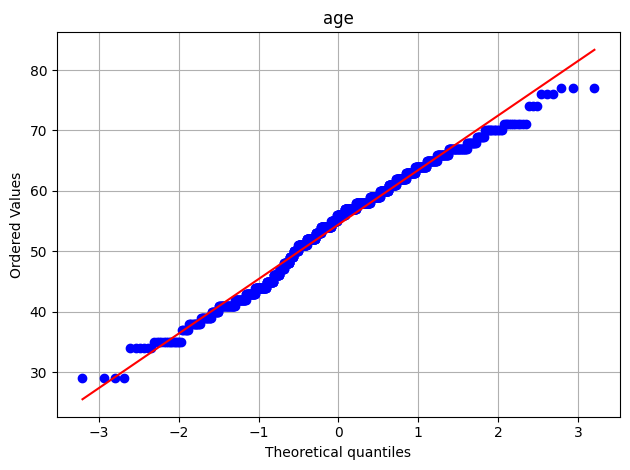

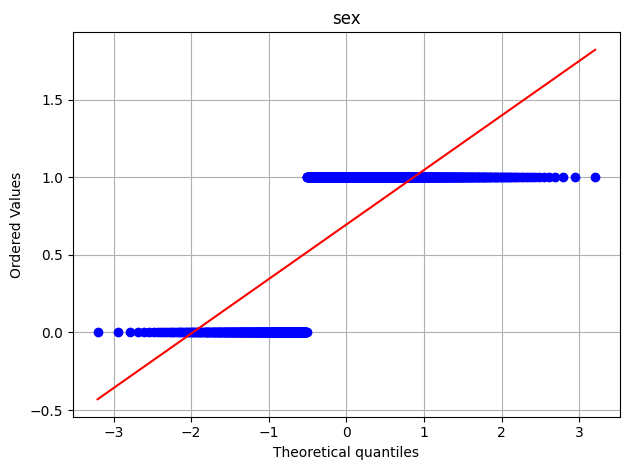

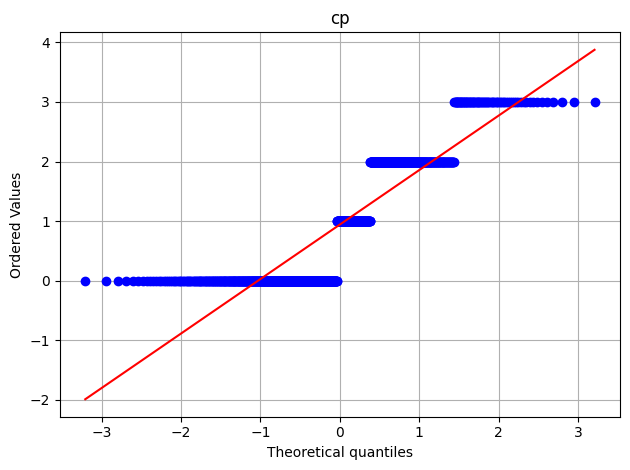

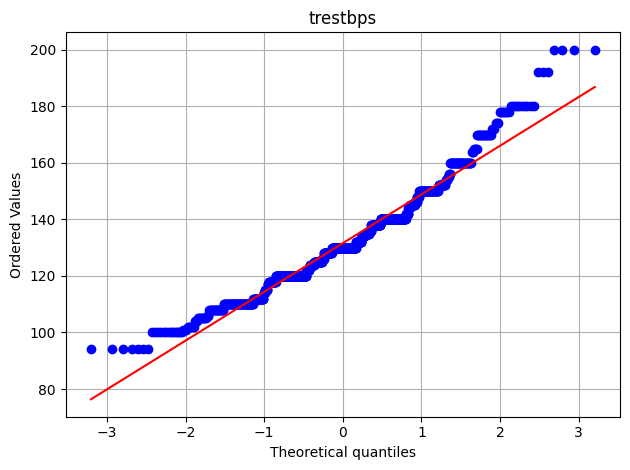

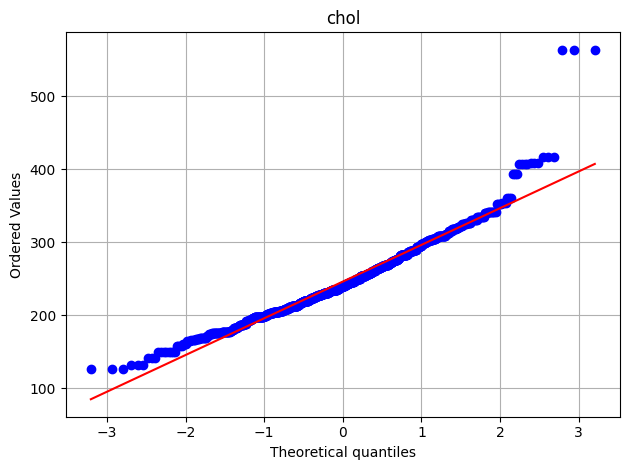

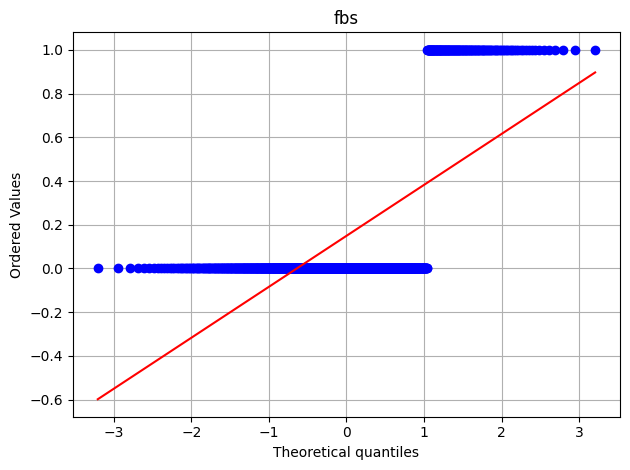

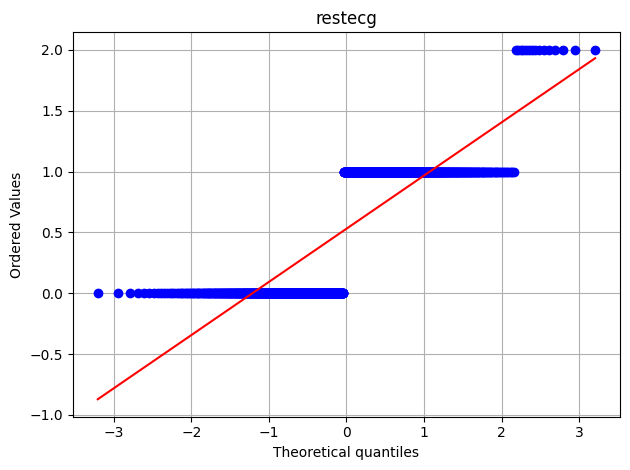

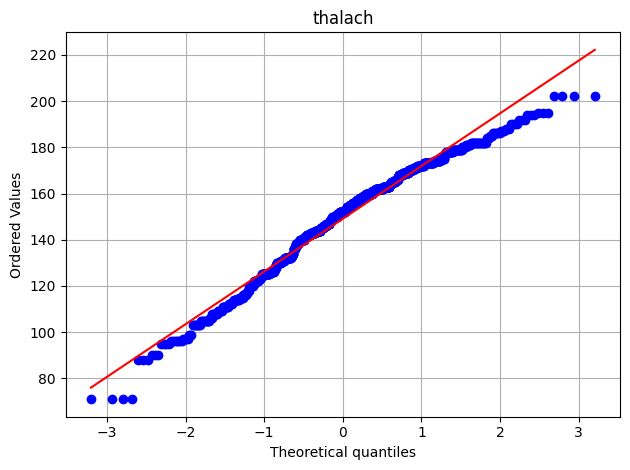

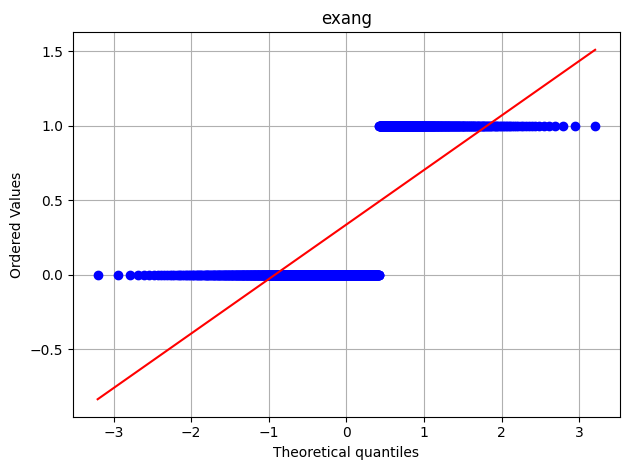

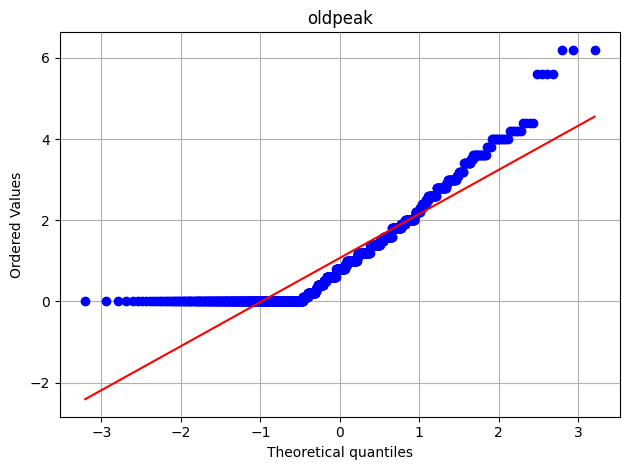

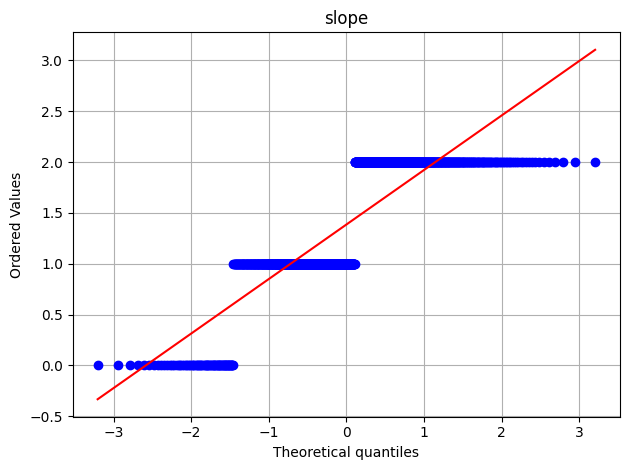

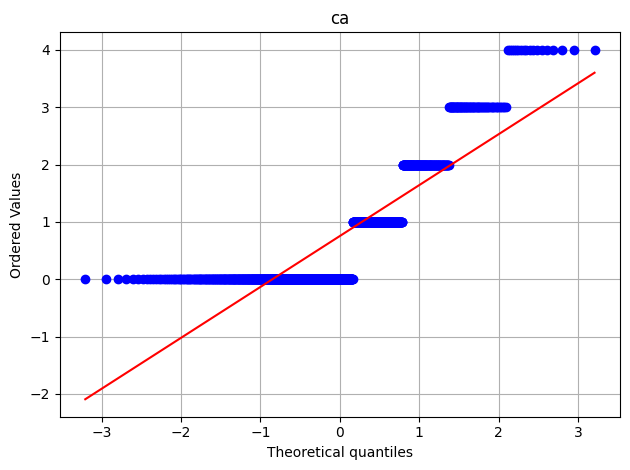

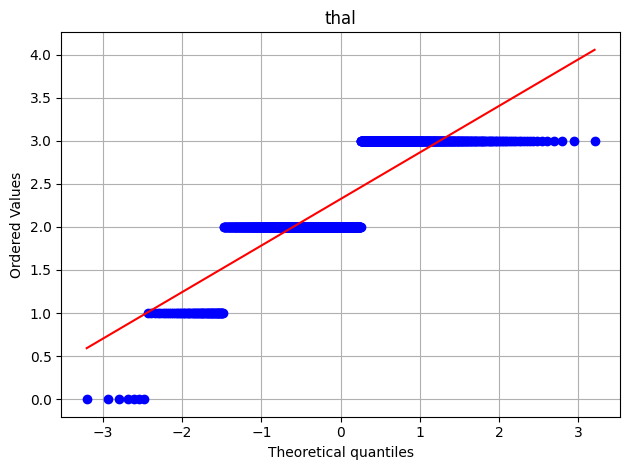

In [187]:
for i in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    stats.probplot(train[i] , plot = plt)
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


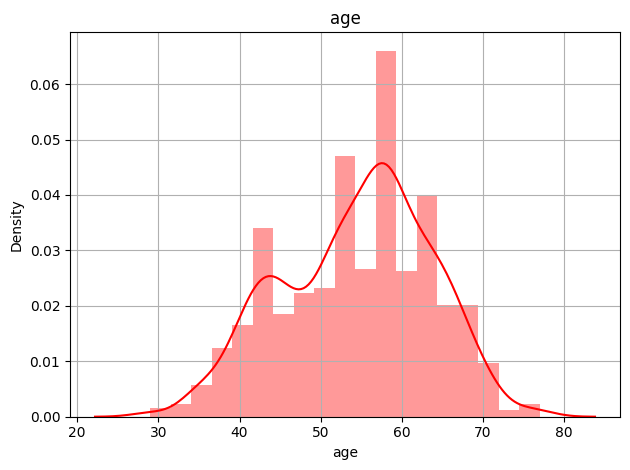

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


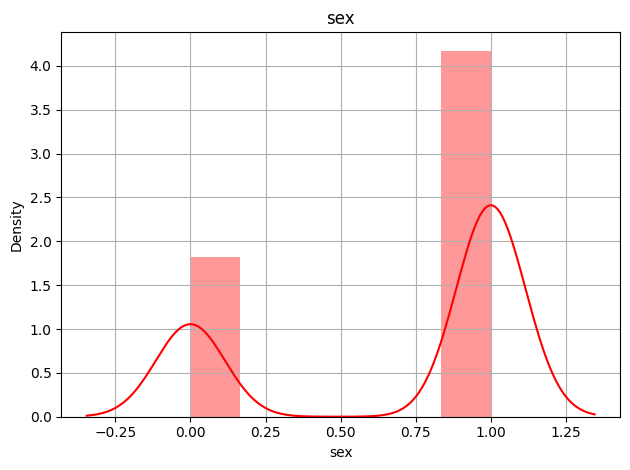

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


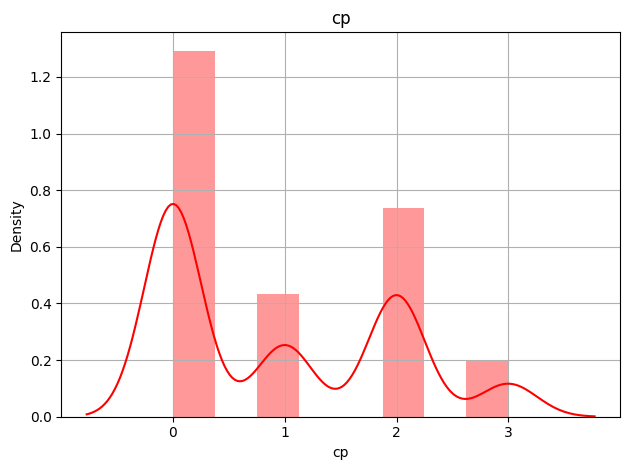

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


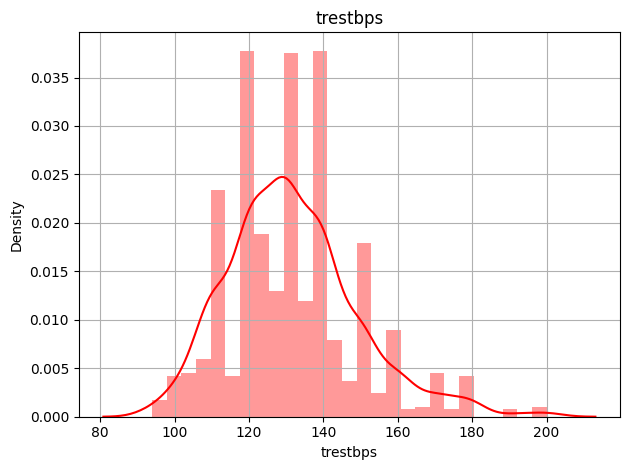

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


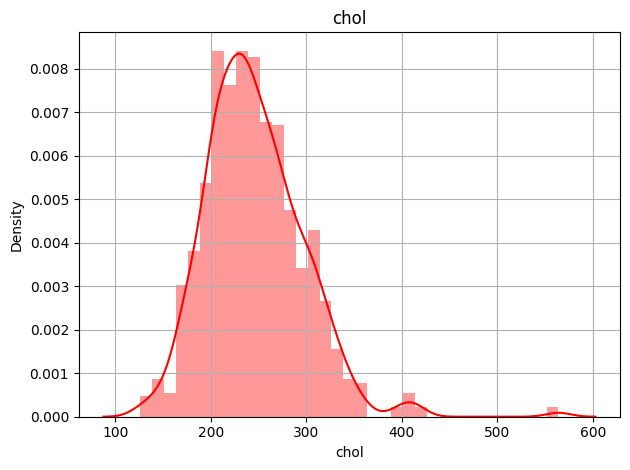

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


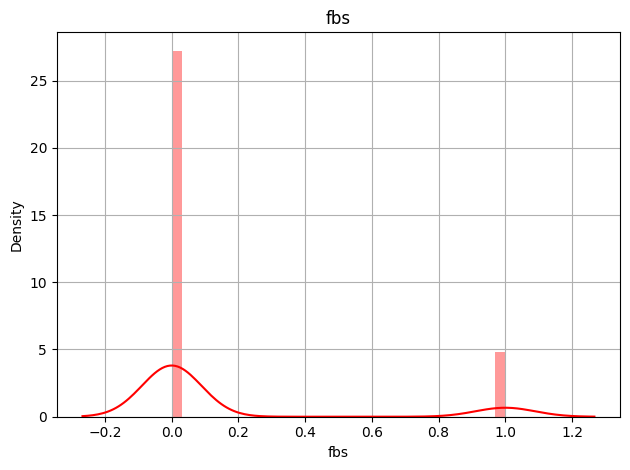

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


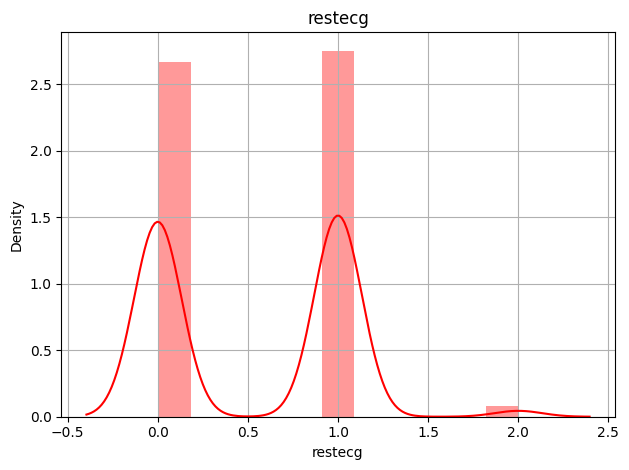

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


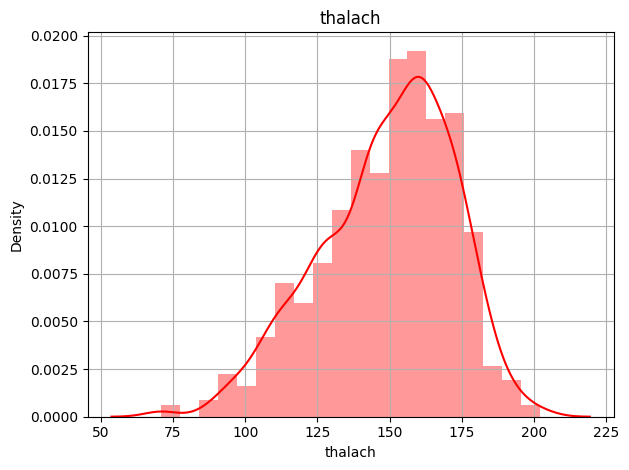

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


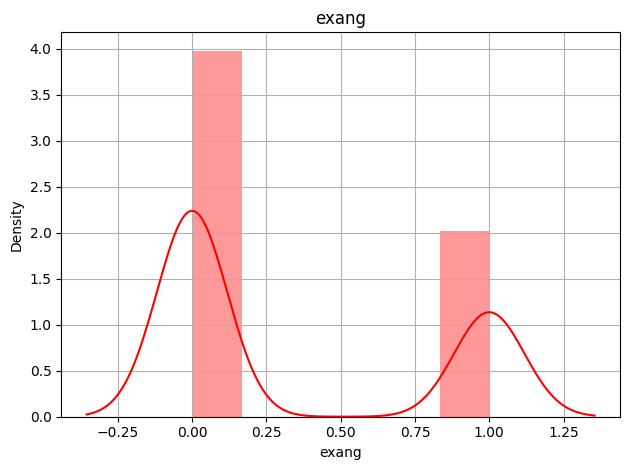

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


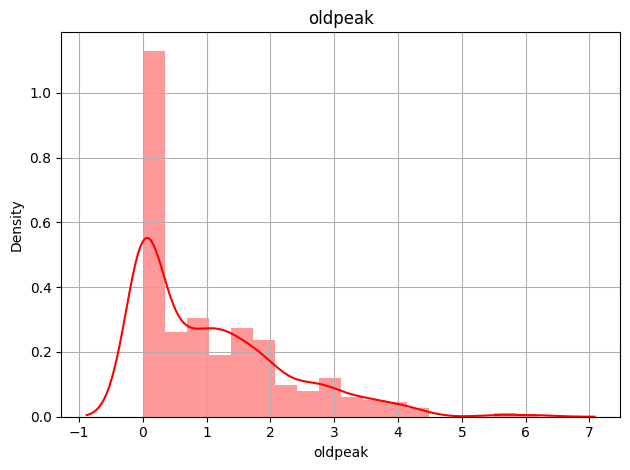

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


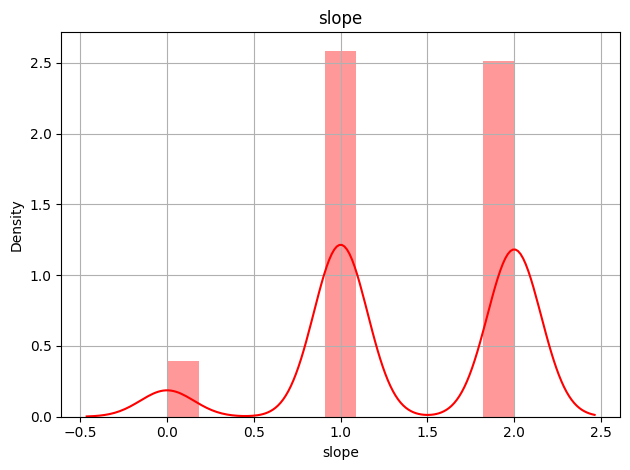

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


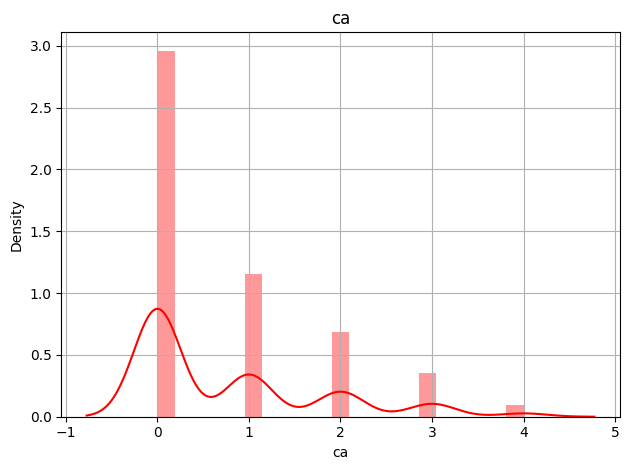

/tmp/ipykernel_33/747345447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


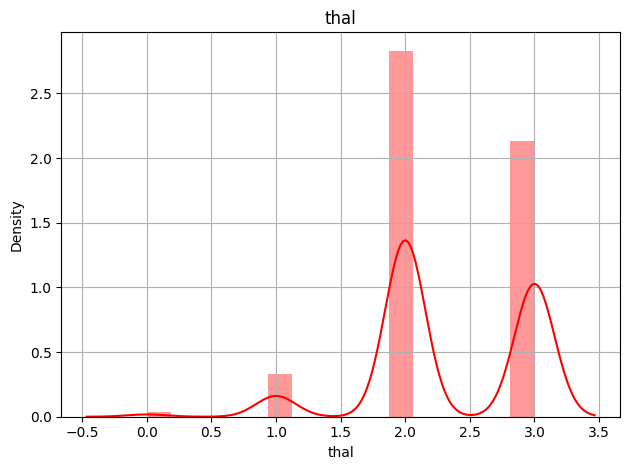

In [188]:
for i in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    sn.distplot(train[i] , color = "red")
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [189]:
train.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

In [190]:
train.kurtosis()

age        -0.525618
sex        -1.277531
cp         -1.149500
trestbps    0.991221
chol        3.996803
fbs         1.889859
restecg    -1.309614
thalach    -0.088822
exang      -1.523205
oldpeak     1.314471
slope      -0.647129
ca          0.701123
thal        0.250827
target     -2.001123
dtype: float64

In [191]:
train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [192]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

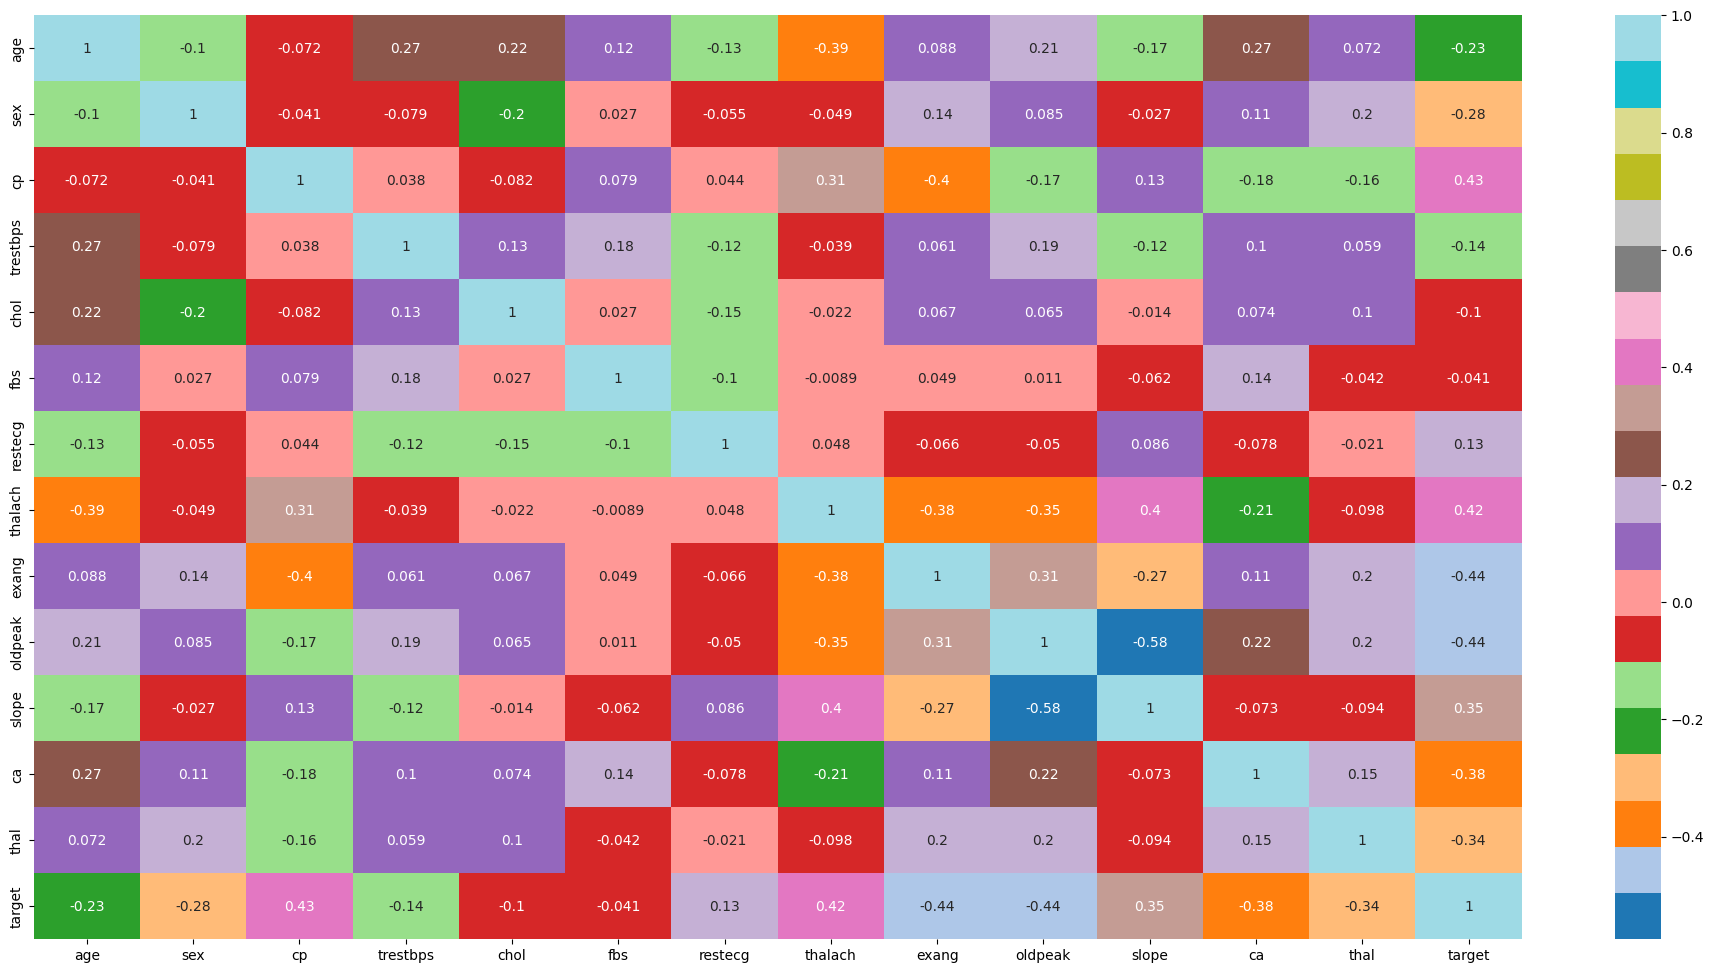

In [193]:
plt.figure(figsize = (24,12))
sn.heatmap(train.corr() , annot = True , cmap = "tab20")

In [194]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3-q1
upper_bound = q3+1.5*(iqr)
lower_bound = q1-1.5*(iqr)
print(upper_bound)
print(lower_bound)

age          80.5
sex           2.5
cp            5.0
trestbps    170.0
chol        371.0
fbs           0.0
restecg       2.5
thalach     217.0
exang         2.5
oldpeak       4.5
slope         3.5
ca            2.5
thal          4.5
target        2.5
dtype: float64
age          28.5
sex          -1.5
cp           -3.0
trestbps     90.0
chol        115.0
fbs           0.0
restecg      -1.5
thalach      81.0
exang        -1.5
oldpeak      -2.7
slope        -0.5
ca           -1.5
thal          0.5
target       -1.5
dtype: float64


In [195]:
train = train[~((train>upper_bound))|((train<lower_bound))]

In [196]:
train.shape

(1025, 14)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3b4d69900>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3b4d69e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3b4d69660>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe3b4d6a380>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3b4d6a620>,
 'means': []}

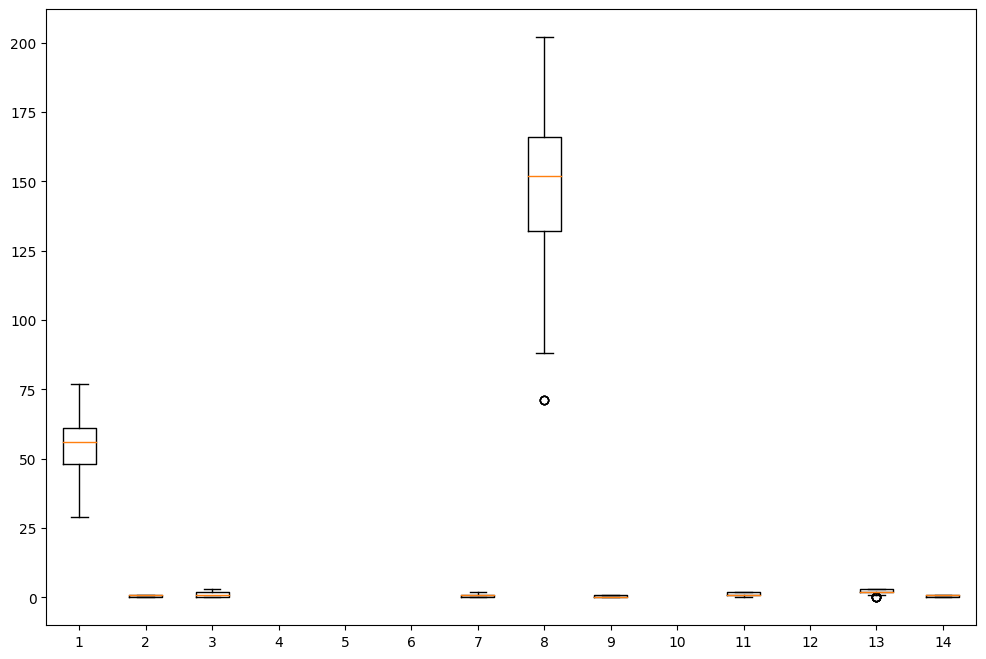

In [197]:
plt.figure(figsize = (12,8))
plt.boxplot(train)

In [198]:
q_1 = test.quantile(0.25)
q_3 = test.quantile(0.75)
iqr_test = q_3-q_1
upper_bound_test = q_3+1.5*(iqr_test)
lower_bound_test = q_1+1.5*(iqr_test)
print(upper_bound_test , lower_bound_test)

age          81.25
sex           2.50
cp            5.00
trestbps    170.00
chol        369.75
fbs           0.00
restecg       2.50
thalach     214.75
exang         2.50
oldpeak       4.00
slope         3.50
ca            2.50
thal          4.50
target        2.50
dtype: float64 age          67.75
sex           1.50
cp            3.00
trestbps    150.00
chol        306.25
fbs           0.00
restecg       1.50
thalach     182.25
exang         1.50
oldpeak       2.40
slope         2.50
ca            1.50
thal          3.50
target        1.50
dtype: float64


In [199]:
test = test[~((test>upper_bound_test))|((test<lower_bound_test))]

In [200]:
test.shape

(303, 14)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3b4ce2ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3b4ce3220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3b4ce2a40>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe3b4ce3760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3b4ce3a00>,
 'means': []}

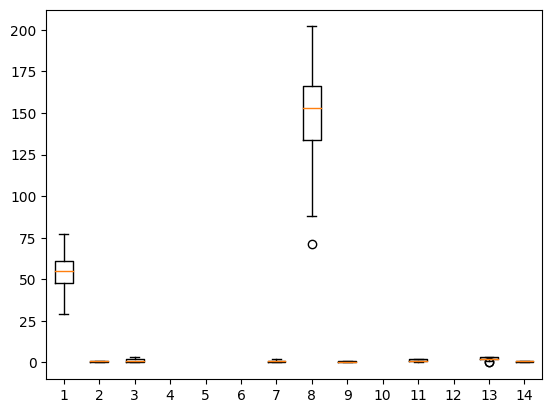

In [201]:
plt.boxplot(test)

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import Adam

In [163]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140.0,203.0,NaN,0,155,1,3.1,0,0.0,3,0
2,70,1,0,145.0,174.0,0.0,1,125,1,2.6,0,0.0,3,0
3,61,1,0,148.0,203.0,0.0,1,161,0,0.0,2,1.0,3,0
4,62,0,0,138.0,294.0,NaN,1,106,0,1.9,1,NaN,2,0


In [203]:
x_train = train.drop(["target"] , axis = 1)
y_train = train["target"]
x_train.shape , y_train.shape

((1025, 13), (1025,))

In [204]:
x_test = test.drop(["target"] , axis = 1)
y_test = test["target"]

In [205]:
x_train.isnull().sum()

age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       0
exang         0
oldpeak       7
slope         0
ca           87
thal          0
dtype: int64

In [206]:
x_train = x_train.fillna(0)

In [207]:
x_test.shape ,   y_test.shape

((303, 13), (303,))

In [208]:
x_test.isnull().sum()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      0
exang        0
oldpeak      5
slope        0
ca          25
thal         0
dtype: int64

In [209]:
x_test = x_test.fillna(0)

In [210]:
x_test.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [211]:
model = LogisticRegression()
model.fit(x_train , y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [212]:
y_pred = model.predict(x_test)

In [213]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [214]:
pd.DataFrame({"y_test":y_test , "y_pred":y_pred})

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
298,0,0
299,0,1
300,0,0
301,0,0


In [215]:
from sklearn.metrics import accuracy_score  , confusion_matrix ,classification_report

In [216]:
result = classification_report(y_test , y_pred)
print("result:",result)

result:               precision    recall  f1-score   support

           0       0.87      0.80      0.84       138
           1       0.85      0.90      0.87       165

    accuracy                           0.86       303
   macro avg       0.86      0.85      0.86       303
weighted avg       0.86      0.86      0.86       303



In [217]:
accuracy_model = accuracy_score(y_test , y_pred)
print(accuracy_model)

0.858085808580858


In [218]:
model_tree = DecisionTreeClassifier(criterion = "entropy" , max_depth = 3)
model_tree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [219]:
y_model_tree = model_tree.predict(x_test)

In [220]:
y_model_tree

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [222]:
pd.DataFrame({"y_model_pred":y_model_tree , "y_test":y_test})

,y_model_pred,y_test
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
298,0,0
299,1,0
300,0,0
301,0,0


In [224]:
accuracy_tree = accuracy_score(y_model_tree , y_test)
print(accuracy_tree)

0.8085808580858086


In [225]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[2] <= 0.5\nentropy = 0.999\nsamples = 1025\nvalue = [499, 526]'),
 Text(0.25, 0.625, 'x[12] <= 2.5\nentropy = 0.804\nsamples = 497\nvalue = [375, 122]'),
 Text(0.125, 0.375, 'x[7] <= 120.0\nentropy = 0.995\nsamples = 221\nvalue = [120, 101]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.984\nsamples = 176\nvalue = [75, 101]'),
 Text(0.375, 0.375, 'x[9] <= 0.65\nentropy = 0.388\nsamples = 276\nvalue = [255, 21]'),
 Text(0.3125, 0.125, 'entropy = 0.85\nsamples = 76\nvalue = [55, 21]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 200\nvalue = [200, 0]'),
 Text(0.75, 0.625, 'x[0] <= 56.5\nentropy = 0.786\nsamples = 528\nvalue = [124, 404]'),
 Text(0.625, 0.375, 'x[12] <= 2.5\nentropy = 0.507\nsamples = 320\nvalue = [36, 284]'),
 Text(0.5625, 0.125, 'entropy = 0.319\nsamples = 259\nvalue = [15, 244]'),
 Text(0.6875, 0.125, 'entropy = 0.929\nsamples = 61\nvalue = [21, 40]'),
 Text(0.875, 0.375, 'x[1] <= 0.5\n

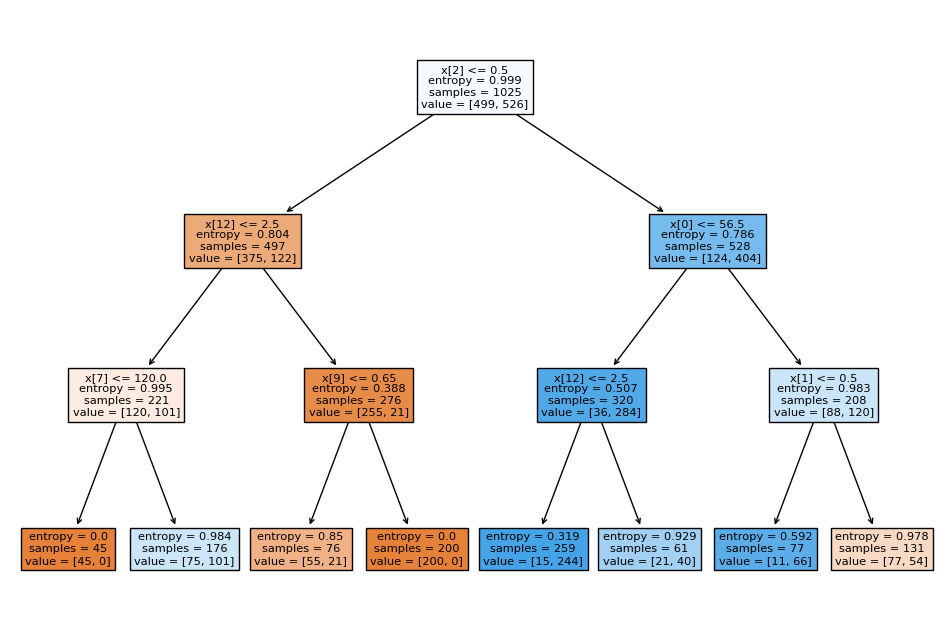

In [226]:
plt.figure(figsize = (12,8))
plot_tree(model_tree , filled = True)

In [227]:
model_random = RandomForestClassifier(n_estimators = 100 , max_features = 5)
model_random.fit(x_train , y_train)

RandomForestClassifier(max_features=5)

In [228]:
y_random_pred = model_random.predict(x_test)

In [229]:
pd.DataFrame({"y_test":y_test , "y_random_pred":y_random_pred})

,y_test,y_random_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
298,0,0
299,0,0
300,0,0
301,0,0


In [230]:
accuracy_random = accuracy_score(y_test , y_random_pred)
print(accuracy_random)

1.0


In [231]:
cm = confusion_matrix(y_test , y_random_pred)
print("confusion_matrix:",cm)

confusion_matrix: [[138   0]
 [  0 165]]


<Axes: >

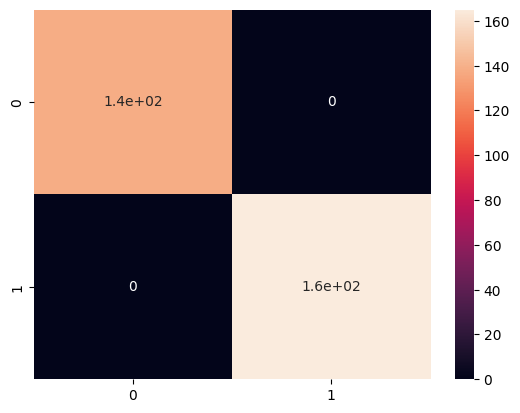

In [232]:
sn.heatmap(cm , annot = True)

In [233]:
x_train.shape

(1025, 13)

In [234]:
model = Sequential()
model.add(Dense(13 , input_dim = 13 , activation = "relu"))
model.add(Dense(32 , activation = "relu"))
model.add(Dense(32 , activation = "relu"))
model.add(Dense(64 , activation = "relu"))
model.add(Dense(32 , activation = "relu"))
model.add(Dense(18 , activation = "relu"))
model.add(Dense(8 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [237]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [238]:
history = model.fit(x_train , y_train , batch_size = 32 , epochs = 50 , validation_split = 0.30)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4810 - loss: 1.4011 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5656 - loss: 0.6669 - val_accuracy: 0.6721 - val_loss: 0.6500
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6365 - loss: 0.6282 - val_accuracy: 0.6461 - val_loss: 0.6174
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6595 - loss: 0.5956 - val_accuracy: 0.6136 - val_loss: 0.6232
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6622 - loss: 0.6013 - val_accuracy: 0.6266 - val_loss: 0.6150
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6740 - loss: 0.5763 - val_accuracy: 0.5942 - val_loss: 0.6132
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6663 - loss: 0.5669 - val_accuracy: 0.6494 - val_loss: 0.6050
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6688 - loss: 0.5698 - val_accuracy: 0.5714 - val_loss

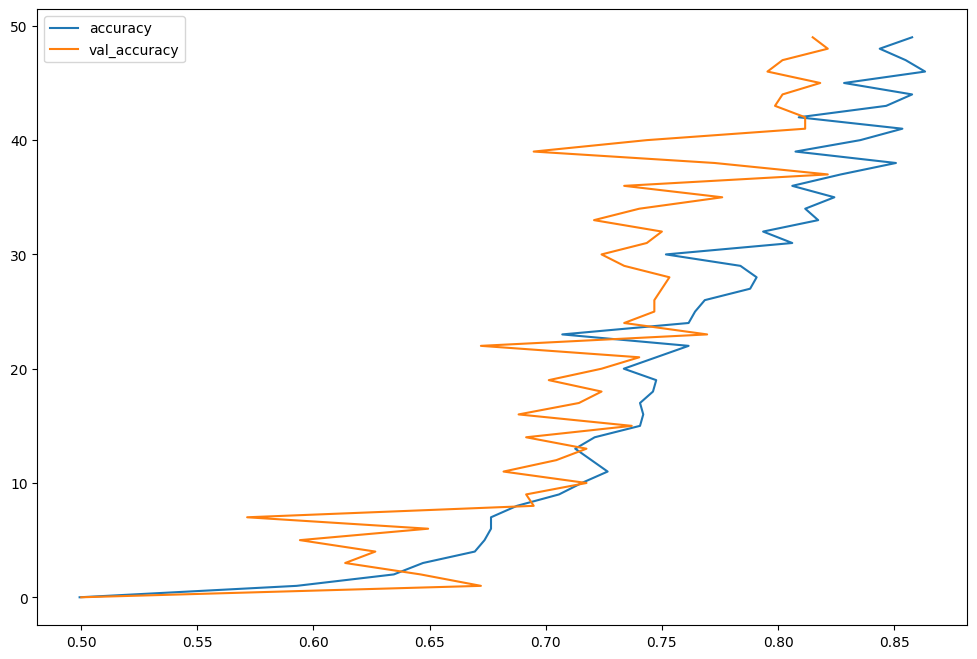

In [241]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(len(acc))
plt.figure(figsize = (12,8))
plt.plot(acc , epochs , label = "accuracy")
plt.plot(val_acc , epochs , label = "val_accuracy")
plt.legend()
plt.show()
